In [4]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import warnings
import numpy as np
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import prophet

In [5]:
start_date = "2020-01-01"
end_date = "2020-08-01"
infy_data=yf.download("INFY",start=start_date,end=end_date)
infy_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,10.30,10.34,10.23,10.29,9.198478,5688000
2020-01-03,10.29,10.35,10.26,10.31,9.216356,6992200
2020-01-06,10.22,10.25,10.17,10.21,9.126963,10068900
2020-01-07,10.12,10.17,10.10,10.10,9.028632,10589100
2020-01-08,10.00,10.12,9.99,10.09,9.019692,13440400
...,...,...,...,...,...,...
2020-07-27,12.68,12.70,12.55,12.67,11.484729,6335100
2020-07-28,12.75,12.79,12.57,12.58,11.403148,9797300
2020-07-29,12.66,12.92,12.65,12.85,11.647889,13711300


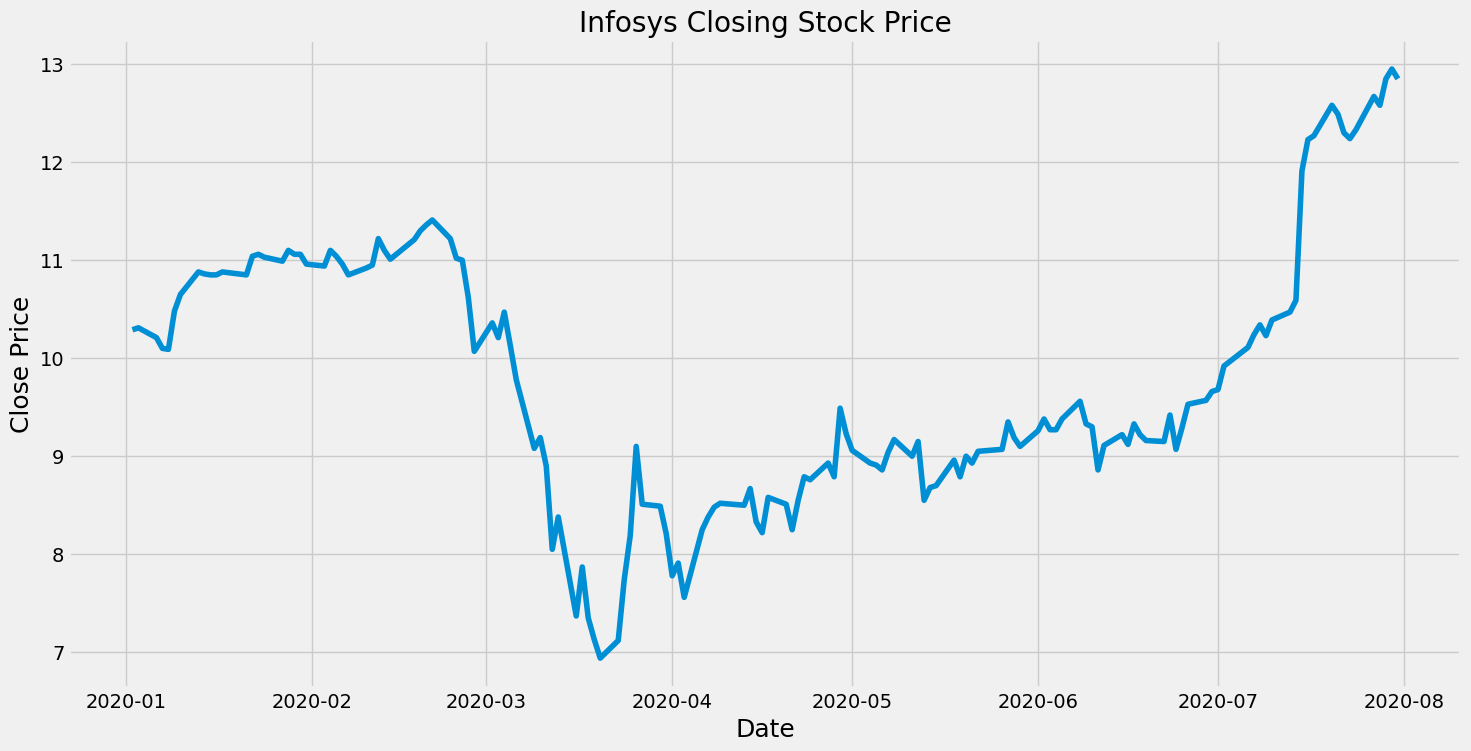

In [6]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Infosys Closing Stock Price")
plt.plot(infy_data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()


In [9]:
infy_data = infy_data.reset_index()

infy_data = infy_data[["Date","Close"]] 
infy_data = infy_data.rename(columns = {"Date":"ds","Close":"y"})
infy_data.head()

,ds,y
0,2020-01-02,10.29
1,2020-01-03,10.31
2,2020-01-06,10.21
3,2020-01-07,10.10
4,2020-01-08,10.09


In [11]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(infy_data)

01:13:56 - cmdstanpy - INFO - Chain [1] start processing
01:13:57 - cmdstanpy - INFO - Chain [1] done processing


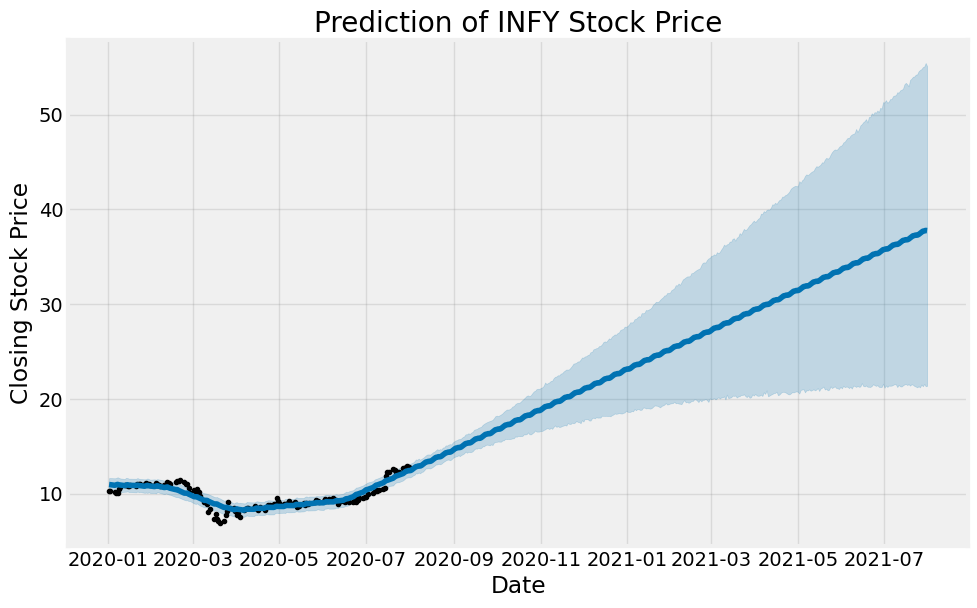

In [12]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of INFY Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

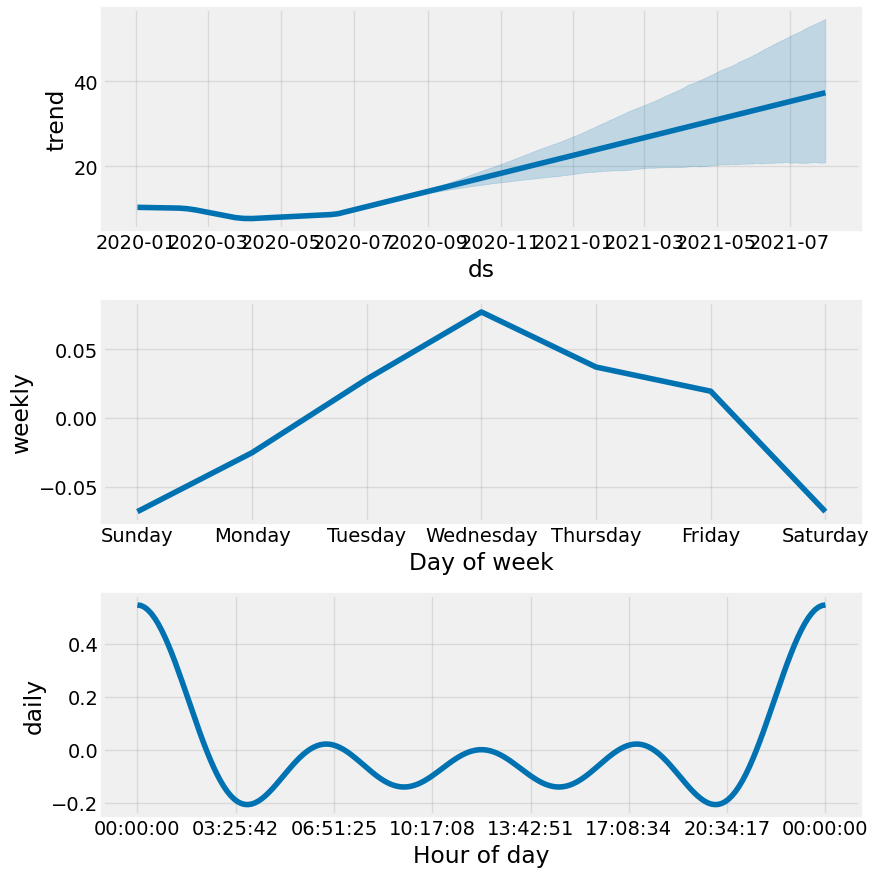

In [13]:
m.plot_components(predictions)
plt.show()
